In [1]:
import re
import matplotlib.pyplot as plt

In [2]:
def get_loss_from_log(path, data):
    metadata_file = path + "\\" + data
    with open(metadata_file) as f:
        lines = f.readlines()
    train_list = []
    valid_list = []
    for i in range(len(lines)):
        # print(i)
        loss = int(re.findall(r"\d+", lines[i])[-2])

        if i % 3 == 1:
            train_list.append(loss)
        elif i % 3 == 2:
            valid_list.append(loss)
    return train_list, valid_list

In [25]:
def show_diff(list1, list2, list3, list4, optimizerName,start=None):
    plt.figure(figsize=(30, 20), dpi=80)
    plt.ylim = max(max(list1), max(list3)) * 1.1
    plt.xlim = len(list2) * 1.1

    plt.plot(list1[start:], label="train_loss with Norm", c="r", marker=".")
    plt.plot(list2[start:], label="valid_loss with Norm", c="r", marker=".", alpha=0.3)

    plt.plot(list3[start:], label="train_loss without Norm", c="g", marker=".")
    plt.plot(list4[start:], label="valid_loss without Norm", c="g", marker=".", alpha=0.3)

    plt.legend(loc="upper right", fontsize="30")

    plt.title("Comparison " + str(optimizerName) + "_Loss w/o Normalization" + "\n" +
              "from epoch {} to epoch {}".format(start, len(list1) - 1), fontsize="30")

    plt.show()

In [31]:
path1 = 'SGD_with_channel_norm'
data = 'log_info.txt'
train_list1, valid_list1 = get_loss_from_log(path1, data)
path2 = 'SGD_without_channel_norm'
train_list2, valid_list2 = get_loss_from_log(path2, data)
path3 = 'ADAM_with_image_channel_norm'
train_list3, valid_list3 = get_loss_from_log(path3, data)
path4 = 'ADAM_without_image_channel_norm'
train_list4, valid_list4 = get_loss_from_log(path4, data)

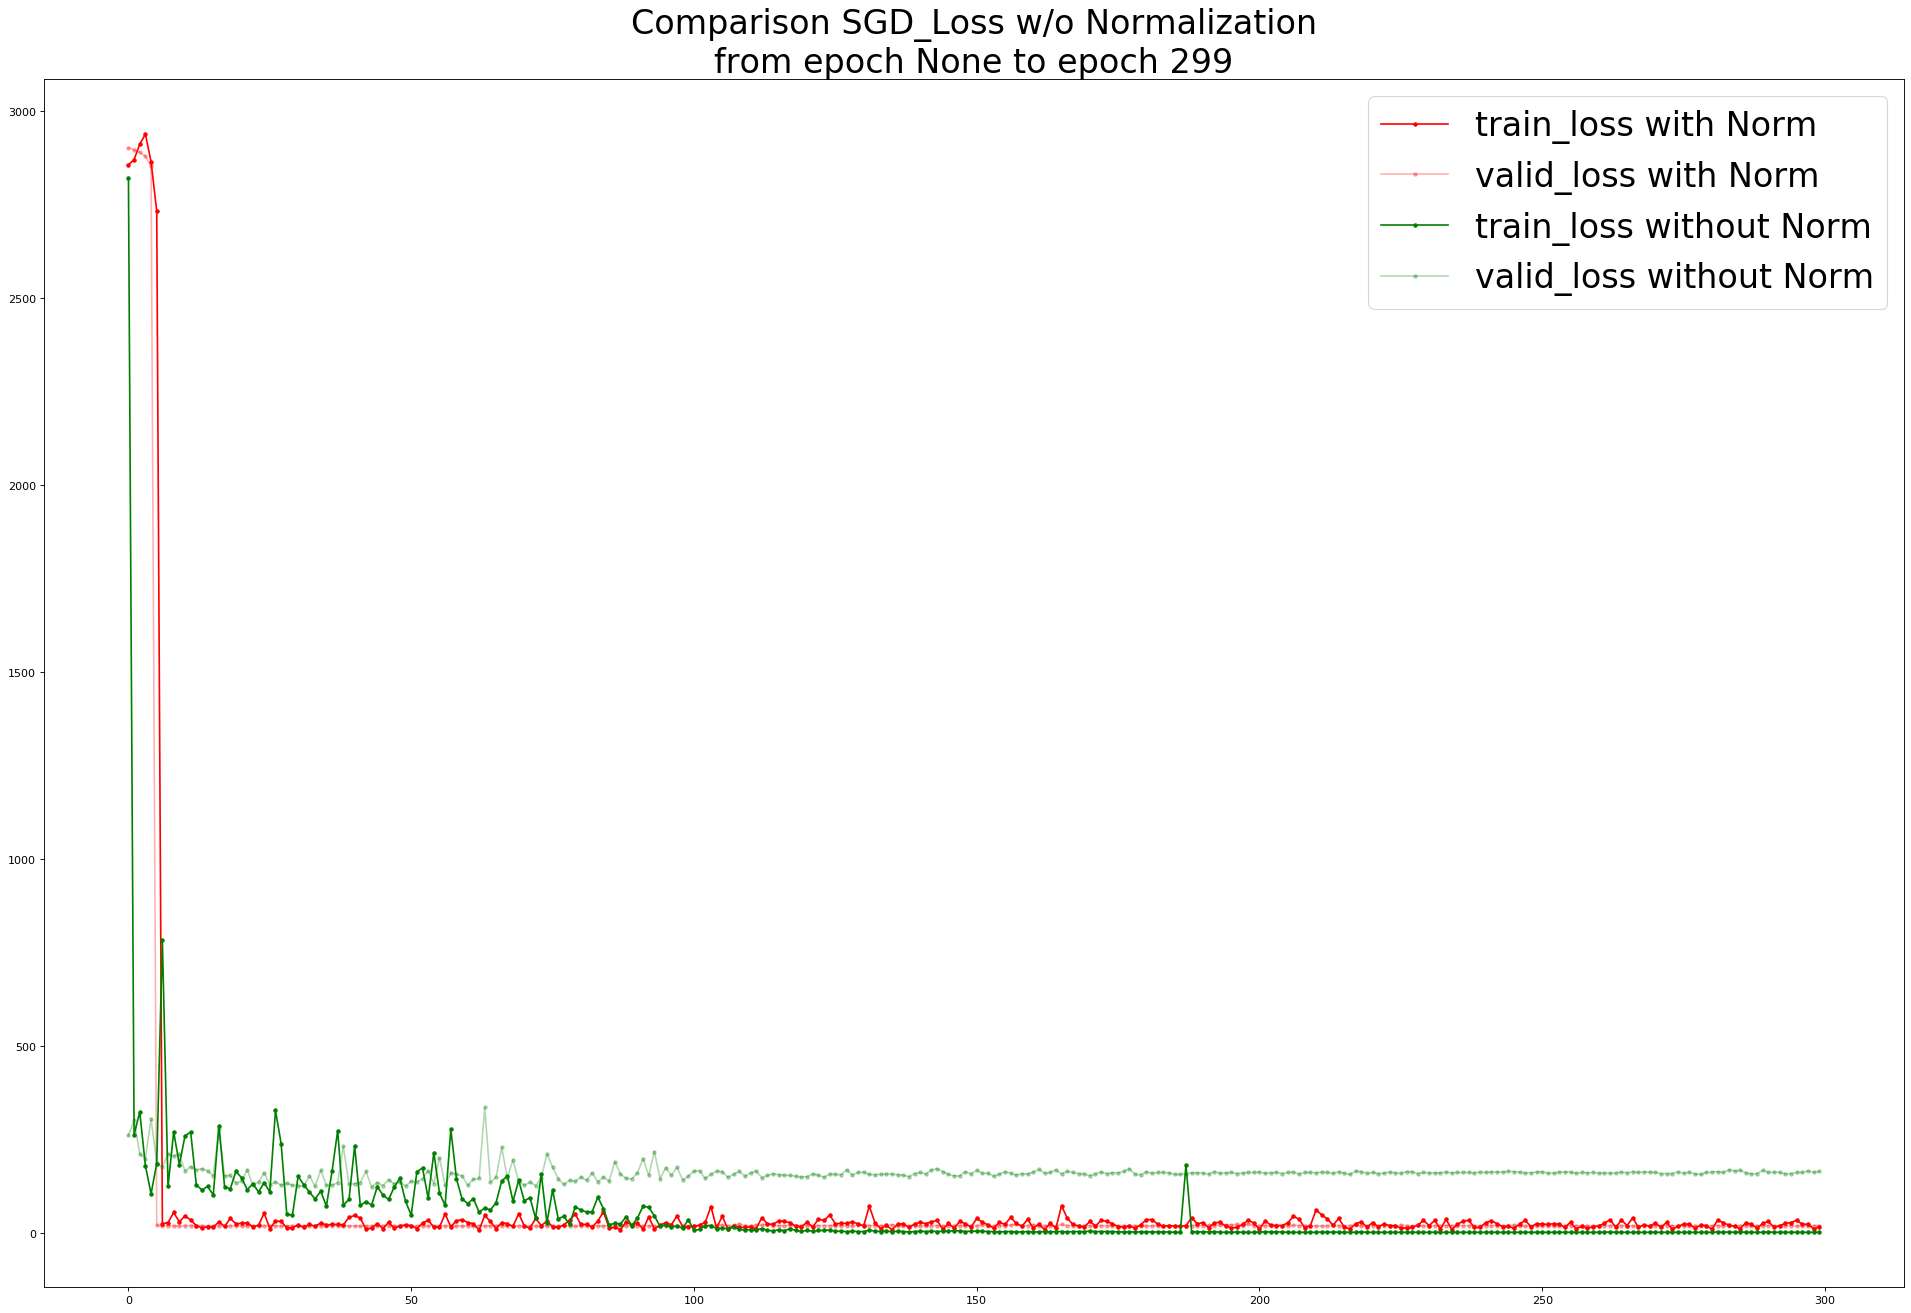

In [32]:
# SGD优化器，有无Normd对比图
show_diff(train_list1, valid_list1,train_list2, valid_list2,"SGD")

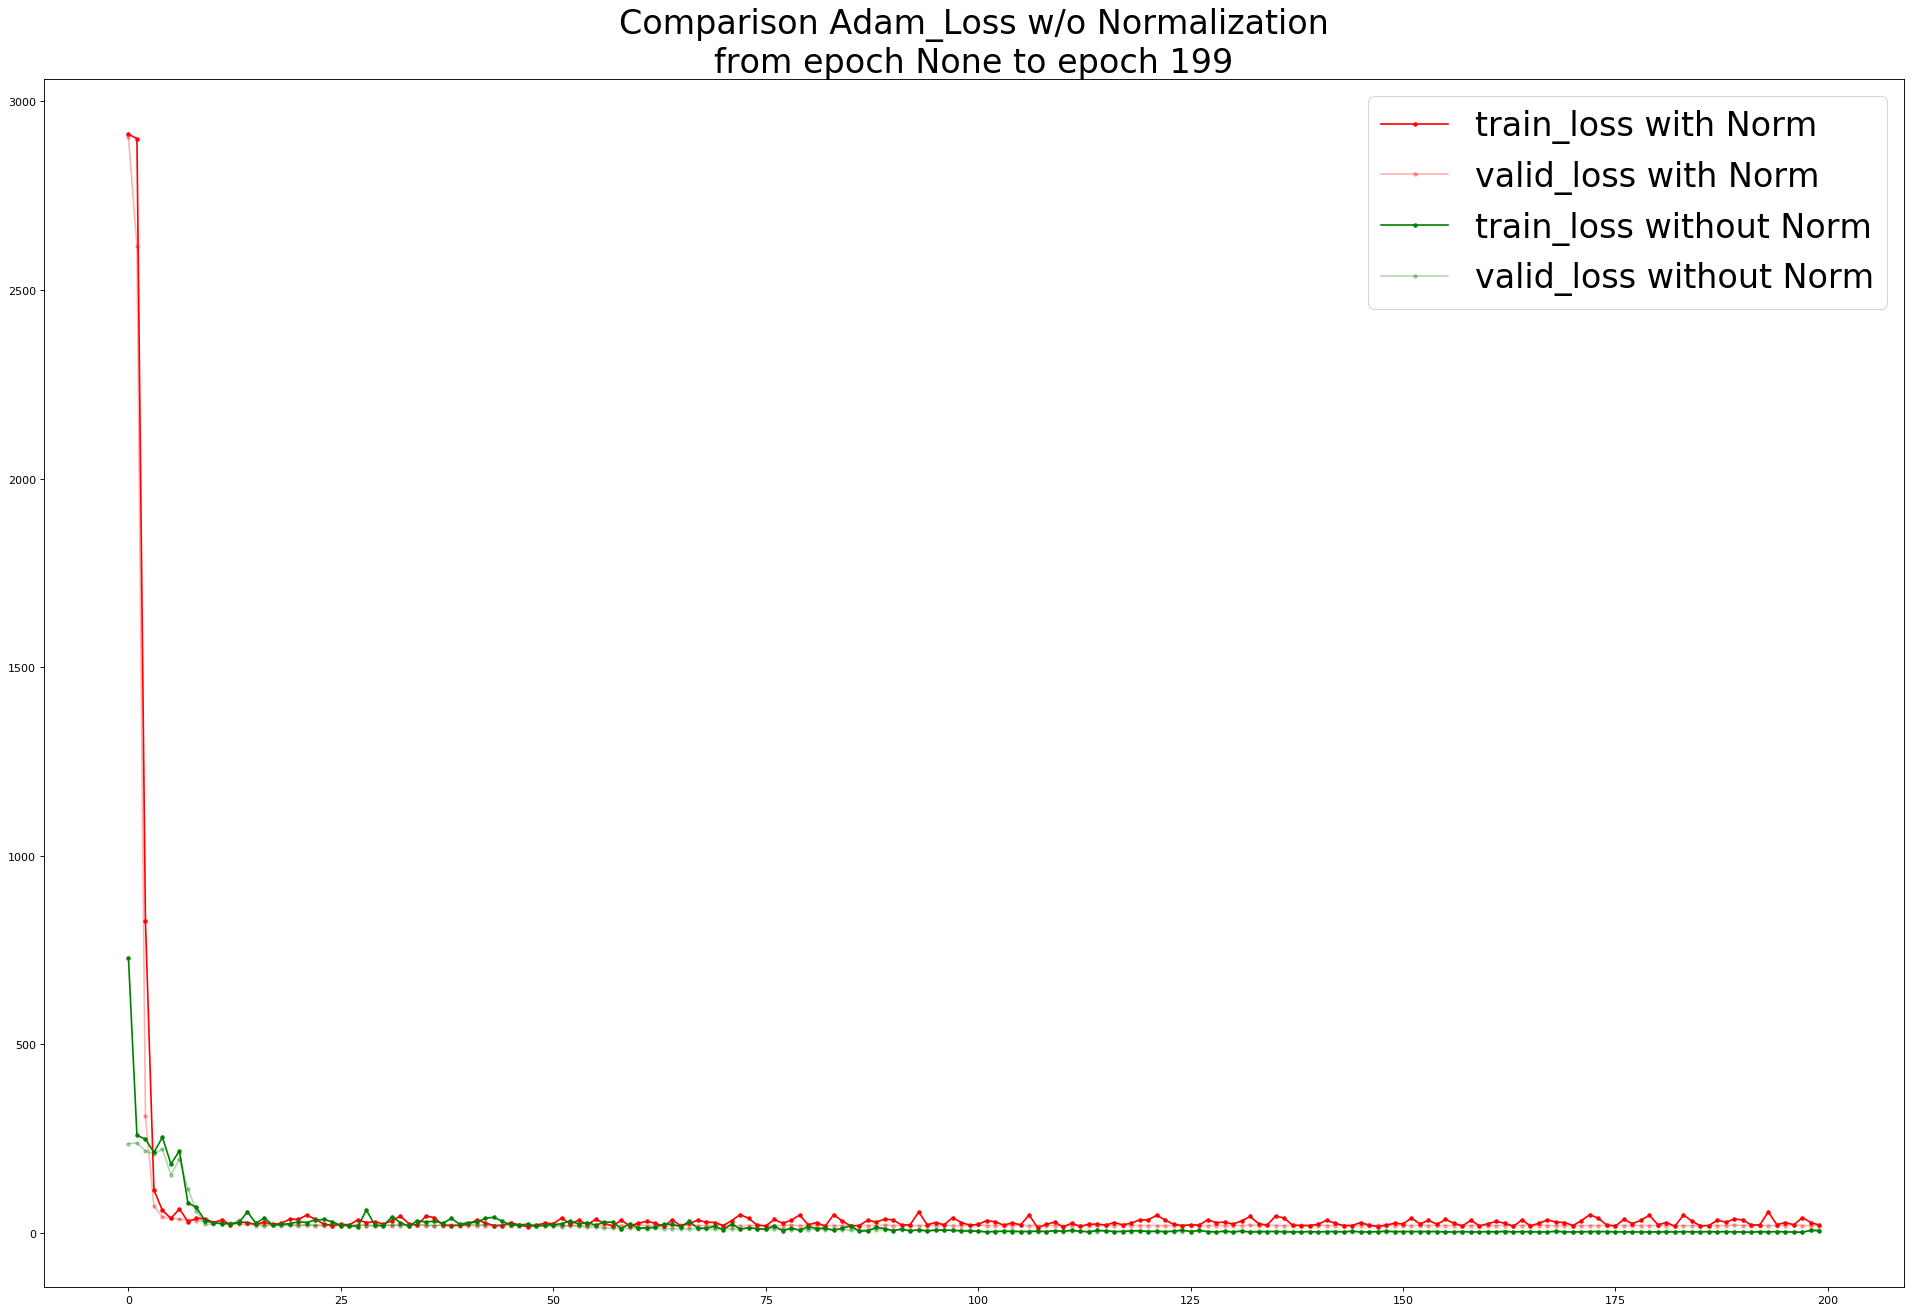

In [33]:
# Adam优化器，有无Normd对比图
show_diff(train_list3, valid_list3,train_list4, valid_list4, "Adam")